In [215]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
get_ipython().run_line_magic('matplotlib', 'inline')


# read in the data
crimeusa_data = pd.read_csv('R_CRIMEUSA_API.csv')
usacrime_data = pd.read_csv('R_USACRIME_API.csv')
cleaned_tweet_data = pd.read_csv('cleaned_twitter_crimeusa_data_py.csv')

#merge the two data frames
tweet_data_crimeusa = pd.concat([crimeusa_data, usacrime_data], axis=0)
tweet_data_crimeusa.head()

#add cloumn label for the data frame as 'USACRIME'
tweet_data_crimeusa['label'] = 'USA CRIME'
#remove retweets
tweet_data_crimusa = tweet_data_crimeusa[~tweet_data_crimeusa['text'].str.contains('RT')]

#merge clean text column from cleaned tweet data with the tweet data
tweet_data_crimeusa = pd.merge(tweet_data_crimeusa, cleaned_tweet_data, on='text', how='left')

#drop the columns 'Tweet_tokenized','Tweet_without_stop_punct','Tweet_stemmed','Tweet_lemmatized' that are not needed 
tweet_data_crimeusa = tweet_data_crimeusa.drop(['Unnamed: 0_x','Unnamed: 0_y','text','Tweet_tokenized','Tweet_without_stop','Tweet_stemmed'], axis=1)

#insert cloumn label and clean text column to the first two columns
tweet_data_crimeusa.insert(0, 'label', tweet_data_crimeusa.pop('label'))
tweet_data_crimeusa.insert(1, 'clean text', tweet_data_crimeusa.pop('clean text'))

#rename the column 'clean text' to 'text'
tweet_data_crimeusa = tweet_data_crimeusa.rename(columns={'clean text':'text'})

#read fbi data
fbi_data = pd.read_csv('R_FBI_API.csv')
tweet_fbi_data = pd.read_csv('cleaned_twitter_fbi_data_py.csv')

#add cloumn label for the data frame as 'USACRIME'
fbi_data['label'] = 'FBI'

#remove retweets
fbi_data = fbi_data[~fbi_data['text'].str.contains('RT')]

#merge clean text column from cleaned tweet data with the tweet data
fbi_data = pd.merge(fbi_data, tweet_fbi_data, on='text', how='left')

#drop the columns 'Tweet_tokenized','Tweet_without_stop_punct','Tweet_stemmed','Tweet_lemmatized' that are not needed
fbi_data = fbi_data.drop(['Unnamed: 0_x','Unnamed: 0_y','text','Tweet_tokenized','Tweet_without_stop','Tweet_stemmed'], axis=1)

#insert cloumn label and clean text column to the first two columns
fbi_data.insert(0, 'label', fbi_data.pop('label'))
fbi_data.insert(1, 'clean text', fbi_data.pop('clean text'))

#rename the column 'clean text' to 'text'
fbi_data = fbi_data.rename(columns={'clean text':'text'})

#merge the two data frames
tweet_data = pd.concat([tweet_data_crimeusa, fbi_data], axis=0)

#remove tweet lemmalized column before exporting the clean tweet data to csv
#tweet_data = tweet_data.drop(['Tweet_lemmatized'], axis=1)


In [216]:
##import packages 

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS

/var/folders/yc/mphc0tn16cx2tqhspm90bcg80000gn/T/ipykernel_84597/538740603.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_tweets']=final_tweets


Text(0, 0.5, 'Frequency')

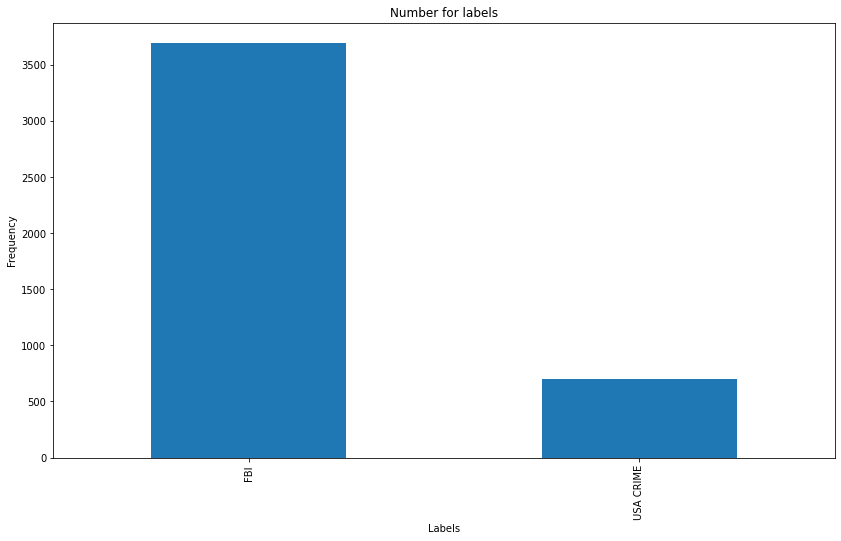

In [217]:
#from the cleaned tweet data, we will use the text lemmatized and label columns for naiye bayes
df =tweet_data[['label','Tweet_lemmatized']]

#remove all the punctuation from text lemmatized column
final_tweets=[str(i).replace(",","").replace("[","").replace("]","").replace("'","") for i in df['Tweet_lemmatized']]

#add the final tweets to the data frame
df['final_tweets']=final_tweets

#remove text lemmatized column
df=df.drop('Tweet_lemmatized',axis=1)


#counting number of fbi and crimeusa data
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")


In [218]:
# Separate majority and minority classes
df_majority = df[df.label=='FBI']
df_minority = df[df.label=='USA CRIME']

#downsample majority class
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


# Display new class counts
df_downsampled.label.value_counts()
X=df_downsampled['final_tweets'].values
y=df_downsampled['label'].values

#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

#countvectorizer
import random as rd
count_vectorizer_content=CountVectorizer(input='content',
                        stop_words='english'
                        #max_features=100
                        )

#scale the data
fit=count_vectorizer_content.fit_transform(X)
column_names=count_vectorizer_content.get_feature_names()
dataframe_content=pd.DataFrame(fit.toarray(),columns=column_names)
dataframe_content['LABEL'] = pd.DataFrame(y,columns=['LABEL'])
dataframe_content.head()

/Users/chaitanyashekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aasga,abbott,abc,abduction,abetting,ability,abl,abolish,aborted,...,日本,東京,汚職,犯罪,皇族,虚偽公文書作成,詐欺,𝗕𝗶𝗱𝗲𝗻,𝗛𝘂𝗻𝘁𝗲𝗿,LABEL
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
#split the data into train and test
rd.seed(1993)
TrainDF, TestDF = train_test_split(dataframe_content, test_size=0.2)
TrainLabels=TrainDF["LABEL"]
TestLabels=TestDF["LABEL"]

TrainDF = TrainDF.drop(["LABEL"], axis=1)
TestDF = TestDF.drop(["LABEL"], axis=1)

from collections import Counter
Counter(y).keys()
Counter(y).values()

dict_values([698, 698])

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       132
           1       0.92      0.99      0.95       148

    accuracy                           0.95       280
   macro avg       0.95      0.95      0.95       280
weighted avg       0.95      0.95      0.95       280



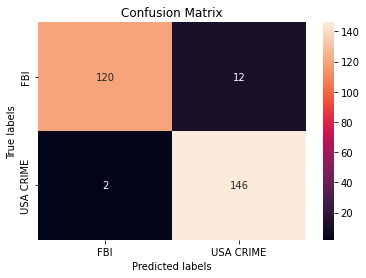

In [220]:
 #NAIVE BAYES MODEL 1
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Model_NB_1= MultinomialNB(alpha = 1)

NB1=Model_NB_1.fit(TrainDF, TrainLabels)
Preds_1 = Model_NB_1.predict(TestDF)
Pred_Prob = Model_NB_1.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds_1))
cnf_matrix1 = confusion_matrix(TestLabels, Preds_1)

##Visualise Confusion Matrix
labels = ['FBI', 'USA CRIME']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds_1), annot=True, fmt='g', ax=ax1)
# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels')
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels)
plt.show()
plt.close()


              precision    recall  f1-score   support

           0       0.98      0.93      0.96       132
           1       0.94      0.99      0.96       148

    accuracy                           0.96       280
   macro avg       0.96      0.96      0.96       280
weighted avg       0.96      0.96      0.96       280



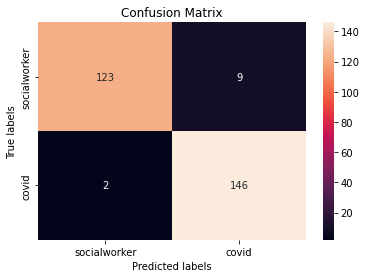

In [221]:
#NAIVE BAYES MODEL 2
Model_NB_2= MultinomialNB(alpha =5)

NB2=Model_NB_2.fit(TrainDF, TrainLabels)
Preds_2 = Model_NB_2.predict(TestDF)
Pred_Prob_2 = Model_NB_2.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds_2))
cnf_matrix1 = confusion_matrix(TestLabels, Preds_2)

##Visualise Confusion Matrix
labels = ['socialworker', 'covid']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds_2), annot=True, fmt='g', ax=ax1)

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels')
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels)
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       132
           1       0.98      0.97      0.98       148

    accuracy                           0.97       280
   macro avg       0.97      0.98      0.97       280
weighted avg       0.98      0.97      0.98       280



/Users/chaitanyashekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


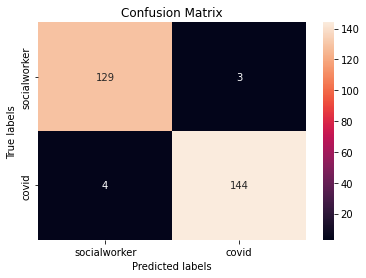

In [222]:
#NAIVE BAYES MODEL 3
Model_NB_3= MultinomialNB(alpha =0)

NB3=Model_NB_3.fit(TrainDF, TrainLabels)
Preds_3 = Model_NB_3.predict(TestDF)
Pred_Prob_3 = Model_NB_3.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds_3))
cnf_matrix1 = confusion_matrix(TestLabels, Preds_3)

##Visualise Confusion Matrix
labels = ['socialworker', 'covid']
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds_3), annot=True, fmt='g', ax=ax1);

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()
